In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac, non_negative_parafac, non_negative_parafac_hals, tucker
from scipy.interpolate import interp1d
import tlviz

In [83]:
data = np.load("tensor_data.npz")
low_tensor = tl.tensor(data["low_tensor"])
high_tensor = tl.tensor(data["high_tensor"])

In [57]:
def normalize_per_patient_max(tensor):
    """Normalize each patient's TCR values by their maximum count."""
    max_per_patient = np.max(tensor, axis=(0, 1), keepdims=True)
    max_per_patient[max_per_patient == 0] = 1
    return tensor / max_per_patient

In [62]:
low_tensor = tl.tensor(low_tensor)
low_tensor = normalize_per_patient_max(low_tensor)

In [47]:
low_weights, low_factors = non_negative_parafac(low_tensor, rank=4)

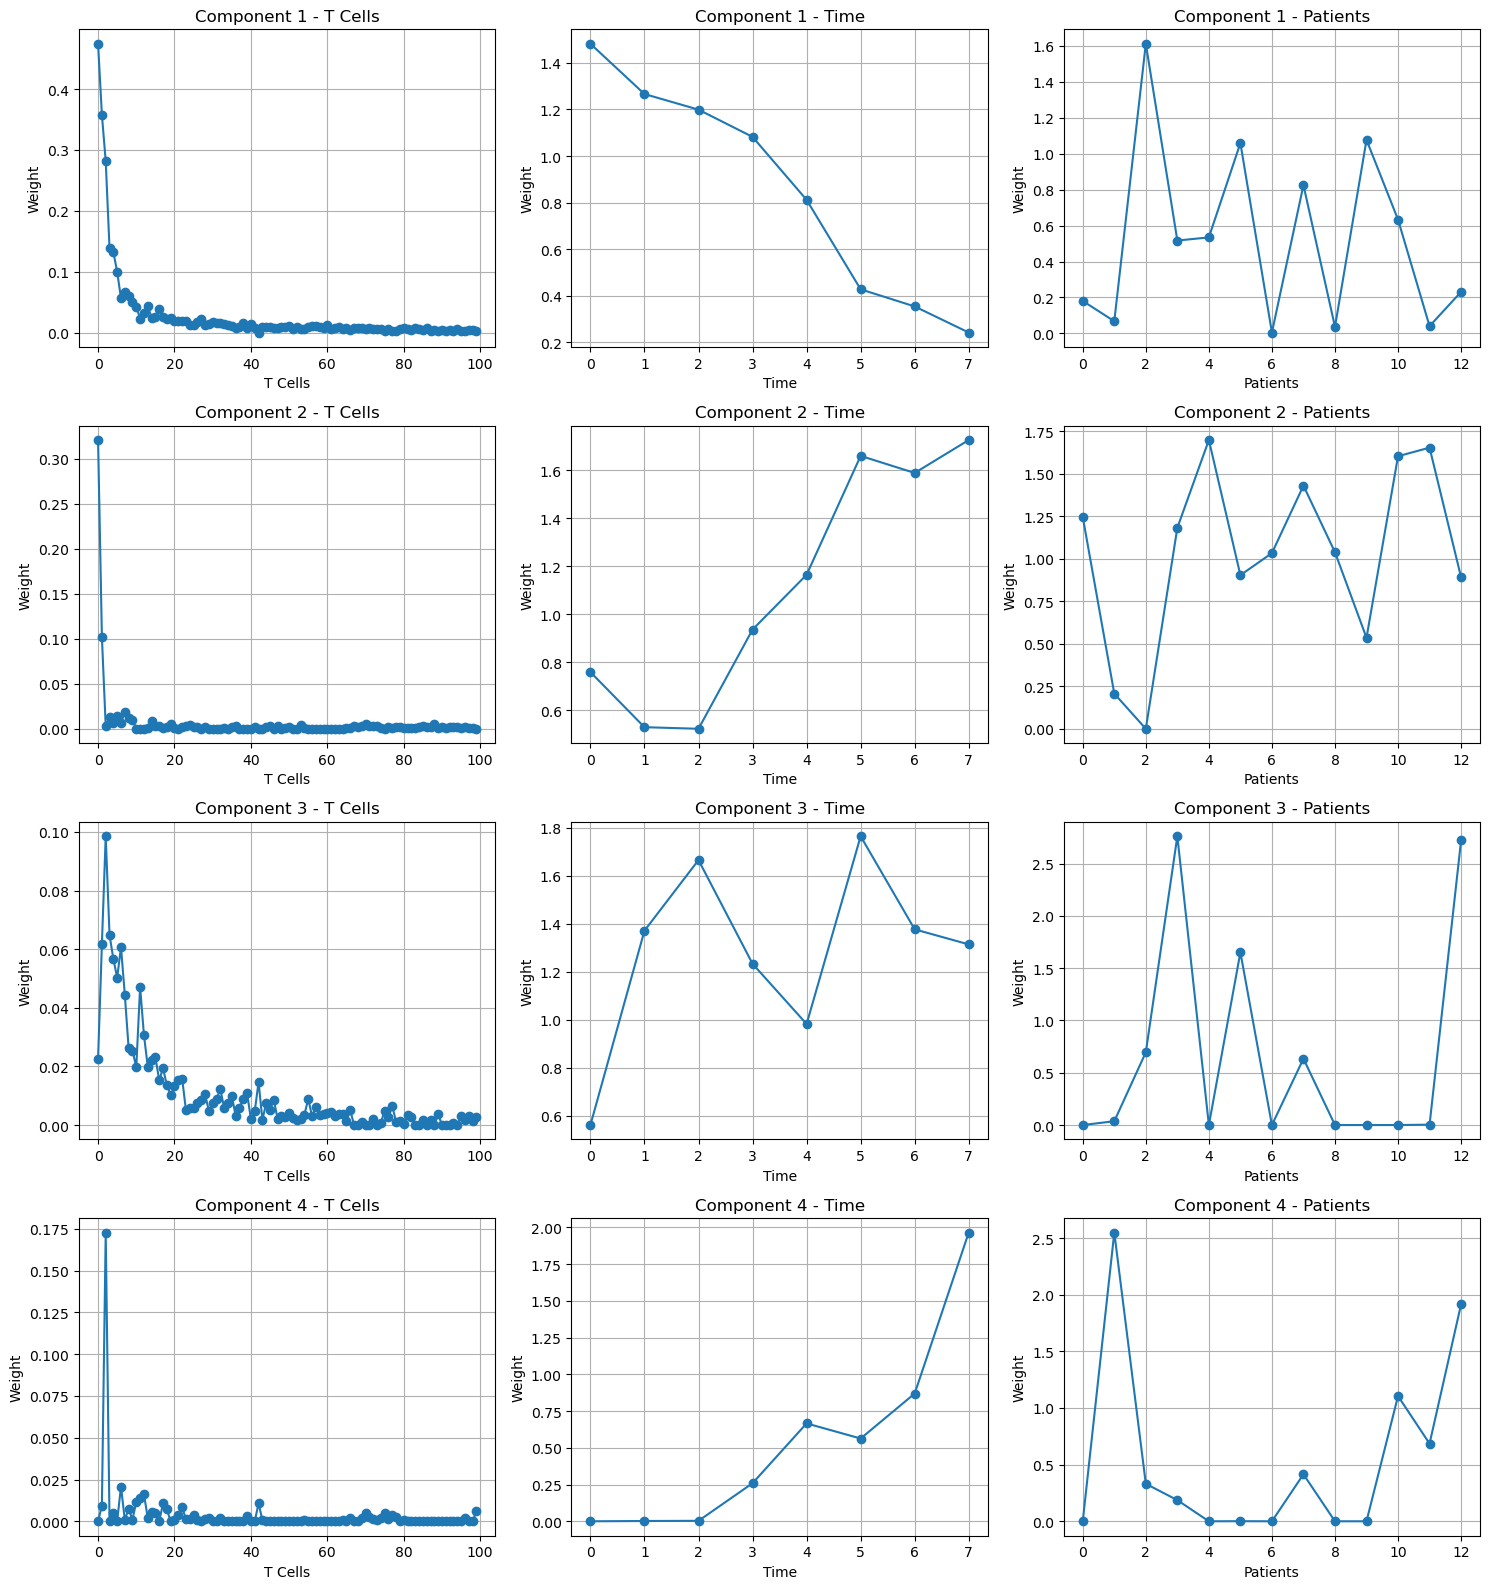

In [48]:
factor_labels = ["T Cells", "Time", "Patients"]
x_labels = [range(f.shape[0]) for f in low_factors]

num_components = low_factors[0].shape[1]

fig, axes = plt.subplots(num_components, 3, figsize=(15, 4 * num_components))

for component in range(num_components):
    for dim in range(3):
        ax = axes[component, dim]
        ax.plot(x_labels[dim], low_factors[dim][:, component], marker='o', linestyle='-')
        ax.set_title(f"Component {component+1} - {factor_labels[dim]}")
        ax.set_xlabel(factor_labels[dim])
        ax.set_ylabel("Weight")
        ax.grid(True)

plt.tight_layout()
plt.show()

In [63]:
mean_patients = np.mean(low_tensor, axis=2)
std_patients = np.std(low_tensor, axis=2)

mean_time = np.mean(low_tensor, axis=1)
std_time = np.std(low_tensor, axis=1)

mean_sequences = np.mean(low_tensor, axis=0)
std_sequences = np.std(low_tensor, axis=0)

print("Overall mean across patients:", np.mean(mean_patients))
print("Overall std deviation across patients:", np.std(mean_patients))

print("Overall mean across time:", np.mean(mean_time))
print("Overall std deviation across time:", np.std(mean_time))

print("Overall mean across sequences:", np.mean(mean_sequences))
print("Overall std deviation across sequences:", np.std(mean_sequences))

Overall mean across patients: 0.029036643413144242
Overall std deviation across patients: 0.07340310628127955
Overall mean across time: 0.02903664341314425
Overall std deviation across time: 0.08689722749014737
Overall mean across sequences: 0.029036643413144245
Overall std deviation across sequences: 0.02233886332092669


In [64]:
mean_patients = np.mean(high_tensor, axis=2)
std_patients = np.std(high_tensor, axis=2)

mean_time = np.mean(high_tensor, axis=1)
std_time = np.std(high_tensor, axis=1)

mean_sequences = np.mean(high_tensor, axis=0)
std_sequences = np.std(high_tensor, axis=0)

print("Overall mean across patients:", np.mean(mean_patients))
print("Overall std deviation across patients:", np.std(mean_patients))

print("Overall mean across time:", np.mean(mean_time))
print("Overall std deviation across time:", np.std(mean_time))

print("Overall mean across sequences:", np.mean(mean_sequences))
print("Overall std deviation across sequences:", np.std(mean_sequences))

Overall mean across patients: 16.36254048582996
Overall std deviation across patients: 61.882804588786456
Overall mean across time: 16.36254048582996
Overall std deviation across time: 123.4261507322946
Overall mean across sequences: 16.36254048582996
Overall std deviation across sequences: 18.115630274315123


In [85]:
high_tensor = tl.tensor(high_tensor)
#high_tensor = normalize_per_patient_max(high_tensor)
high_weights, high_factors = parafac(high_tensor, rank=2)

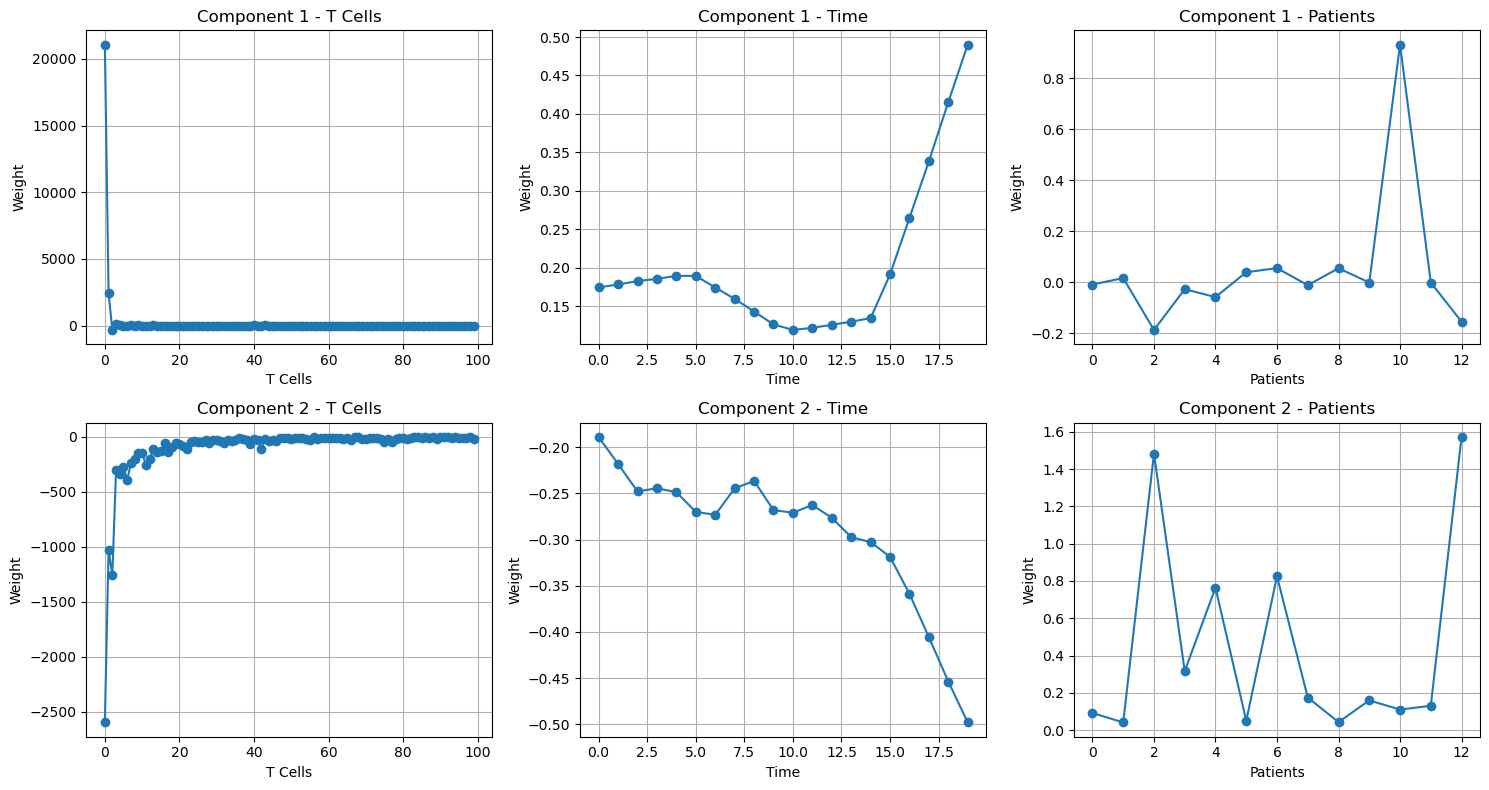

In [86]:
factor_labels = ["T Cells", "Time", "Patients"]
x_labels = [range(f.shape[0]) for f in high_factors]

num_components = high_factors[0].shape[1]

fig, axes = plt.subplots(num_components, 3, figsize=(15, 4 * num_components))

for component in range(num_components):
    for dim in range(3):
        ax = axes[component, dim]
        ax.plot(x_labels[dim], high_factors[dim][:, component], marker='o', linestyle='-')
        ax.set_title(f"Component {component+1} - {factor_labels[dim]}")
        ax.set_xlabel(factor_labels[dim])
        ax.set_ylabel("Weight")
        ax.grid(True)

plt.tight_layout()
plt.show()

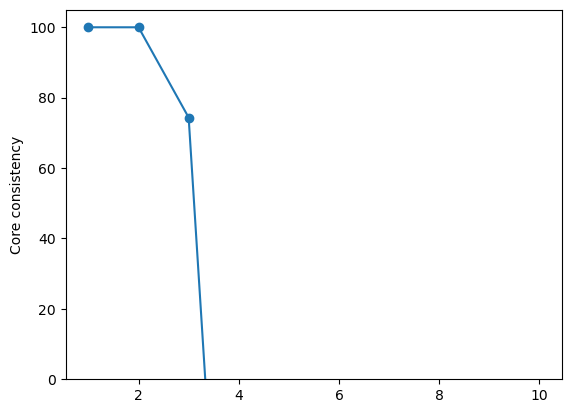

In [84]:
models = {}
for rank in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    models[rank] = parafac(high_tensor, rank=rank)

ax = tlviz.visualisation.scree_plot(models, high_tensor, metric="Core consistency")
ax.set_ylim(0, 105)
plt.show()